# NL data related jobs analysis

QUESTIONS

1. What are the most required skills? 
2. Which city has the most job postings?
2. Which industry has the most job postings?
3. What's the proportion of onsite, hybrid, and remote?
2. What's the proportion of small, medium, large size companies from the job posts?



## Packages

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator


## Read data

In [405]:
data_analyst_df = pd.read_csv('/Users/xup6ru6zp/Desktop/Coding/python-sideproject/data analysis-linkedin jobs/datasets/data analyst_634.csv')
data_engineer_df = pd.read_csv('/Users/xup6ru6zp/Desktop/Coding/python-sideproject/data analysis-linkedin jobs/datasets/data engineer_792.csv')
data_scientist_df = pd.read_csv('/Users/xup6ru6zp/Desktop/Coding/python-sideproject/data analysis-linkedin jobs/datasets/data scientist.csv')
business_analyst_df = pd.read_csv('/Users/xup6ru6zp/Desktop/Coding/python-sideproject/data analysis-linkedin jobs/datasets/business analyst_544.csv')
data_engineer_df


,applicantsCount,applyUrl,companyAddress/addressCountry,companyAddress/addressLocality,companyAddress/addressRegion,companyAddress/postalCode,companyAddress/streetAddress,companyAddress/type,companyDescription,companyEmployeesCount,...,skills/1,skills/2,skills/3,skills/4,skills/5,skills/6,skills/7,skills/8,skills/9,title
0,92.0,https://www.linkedin.com/job-apply/3834997150,NL,Den Haag,Zuid Holland,2516AG,Saturnusstraat 95,PostalAddress,"At Medicine for Business, we form a young, reb...",9.0,...,Azure DevOps Services,Azure SQL,Communication,Critical Thinking,Data Architecture,Data Quality,Data Streaming,"Extract, Transform, Load (ETL)",SQL,Data Engineer
1,72.0,https://www.linkedin.com/job-apply/3840899398,GB,Manchester,Greater Manchester,M2 7HA,"Floor 4, 2-4 Exchange Street",PostalAddress,"Based across The United Kingdom, Netherlands, ...",23.0,...,Azure Data Factory,Azure Data Lake,Azure Databricks,Azure SQL,Azure Service Fabric,DevOps,"Extract, Transform, Load (ETL)",Microsoft Azure Machine Learning,Microsoft Power BI,Data Engineer
2,NaN,https://www.linkedin.com/job-apply/3832314490,GB,Wimbledon,London,SW19 7QW,"Melbury House, 51 Wimbledon Hill Road",PostalAddress,We're specialists in data and AI talent soluti...,209.0,...,NoSQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Engineer
3,25.0,https://www.linkedin.com/job-apply/3845774973,NL,Amsterdam,North Holland,1101 EE,De Entree 252,PostalAddress,We help companies modernize business operation...,2575.0,...,Cloud Operations,Dutch,"Extract, Transform, Load (ETL)",Managed Services,Microsoft Azure,Microsoft Power BI,Microsoft Products,SQL,Service Operations,Data Engineer Managed Services
4,51.0,https://www.linkedin.com/job-apply/3844329773,NL,Rotterdam,South Holland,3032AJ,Schiekade 34,PostalAddress,Teelor koppelt ambitieuze IT en Engineering pr...,11.0,...,Data Management,Data Pipelines,Data Warehousing,NaN,NaN,NaN,NaN,NaN,NaN,Data Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,24.0,https://emea3.recruitmentplatform.com/apply-ap...,NL,Amersfoort,NaN,3818 EX,Laan 1914 35,PostalAddress,We are an independent consultancy firm which i...,6859.0,...,System Administration,Systems Engineering,Troubleshooting,NaN,NaN,NaN,NaN,NaN,NaN,Contractadviseur / systems engineer
788,NaN,https://www.coinbase.com/careers/positions/564...,US,Remote First,NaN,NaN,NaN,PostalAddress,"Founded in June of 2012, Coinbase is a digital...",4521.0,...,Front-End Development,Programming,React.js,Software Development,NaN,NaN,NaN,NaN,NaN,"Early Career Software Engineer, Frontend - Con..."
789,NaN,https://www.coinbase.com/careers/positions/564...,US,Remote First,NaN,NaN,NaN,PostalAddress,"Founded in June of 2012, Coinbase is a digital...",4521.0,...,Communication,Docker Products,Go (Programming Language),GraphQL,MongoDB,NoSQL,Programming,Ruby,Software Development,"Early Career Software Engineer, Backend - Cons..."
790,NaN,https://vanderlande.wd3.myworkdayjobs.com/care...,NL,Veghel,Noord Brabant,5466 RB,Vanderlandelaan 2,PostalAddress,"Vanderlande is a market-leading, global partne...",7319.0,...,English,Fault Analysis,Information and Communications Technology (ICT),Life-cycle Management,Linux,Project Commissioning,Project Delivery,Storage Solutions,VMware,Infrastructure Lead Engineer - ICT Projects


## Data Cleaning
1. Know how much missing values for each column have
2. Select wanted columns + Rename the column
3. Making sure every column have same format and no additional spaces
4. Deal with the missing values for the columns you wanted
5. Drop duplicate, identical rows


In [209]:
def data_cleaning(df, jobcategory):
#     print(df.isnull().sum())
    # columns
    for i in range(0, 10):
        df[f'skills/{str(i)}'].fillna('None', inplace=True)
    df['Skills'] = df[['skills/0', 'skills/1', 'skills/2', 'skills/3', 'skills/4', 'skills/5', 'skills/6', 'skills/7', 'skills/8', 'skills/9']].agg(','.join, axis=1)
    wanted_columns = ['companyAddress/addressCountry', 'companyAddress/addressLocality', 'companyName', 'companyEmployeesCount', 'insightsV2/0', 'location', 'Skills', 'title']
    df = df[wanted_columns]
    df = df.rename(columns={'title':'JobTitle', 'companyAddress/addressCountry':'Country', 'companyAddress/addressLocality':'City', 'companyName':'CompanyName', 'companyEmployeesCount':'EmployeesNum', 'insightsV2/0':'EmployeesRange_Industry', 'location':'Onsite_Remote'})
    
    # add a new column to know what category the job title is
    df['JobCategory'] = f'{jobcategory}'
    
    # making sure every column have same format and no additional spaces
    df['Country'] = df['Country'].str.strip()
    df['City'] = df['City'].str.strip()
    df['CompanyName'] = df['CompanyName'].str.strip()
    df['EmployeesRange_Industry'] = df['EmployeesRange_Industry'].str.strip()
    df['Onsite_Remote'] = df['Onsite_Remote'].str.strip()
    
    # fill missing values
    df['Country'].fillna('NL', inplace=True)
    df['City'].fillna('None', inplace=True)
    df['EmployeesNum'].fillna(10, inplace=True)
    df['EmployeesRange_Industry'].fillna('None', inplace=True)

    # Splitting based on '·' if exists, else treating the whole string as EmployeesRange and Industry as None
    df[['EmployeesNumRange', 'Industry']] = df['EmployeesRange_Industry'].apply(lambda x: pd.Series([x.strip(), 'None']) if '·' not in x else pd.Series(x.split('·')))
    df.drop(columns='EmployeesRange_Industry', inplace=True)
#     print(df.isnull().sum())

    # Extracting 'Hybrid', 'On-site', or 'Remote' using regex
    df['Onsite_Remote'] = df['Onsite_Remote'].str.extract(r'\((Hybrid|On-site|Remote)\)')
    
    # filter out the jobs that are not in NL
    df = df[df['Country'] == 'NL']
    
    # Drop duplicate, identical rows
    df.drop_duplicates(inplace=True)
    
    return df

data_analyst_df = data_cleaning(data_analyst_df, 'data analyst')
data_engineer_df = data_cleaning(data_engineer_df, 'data engineer')
data_scientist_df = data_cleaning(data_scientist_df, 'data scientist')
business_analyst_df = data_cleaning(business_analyst_df, 'business analyst')
data_analyst_df

,Country,City,CompanyName,EmployeesNum,Onsite_Remote,Skills,JobTitle,JobCategory,EmployeesNumRange,Industry
0,NL,Steenwijk,Zorggroep Oude en Nieuwe Land,598.0,Hybrid,"AFAS Software,Analytical Skills,Data Analysis,...",Data-analist,data analyst,"1,001-5,000 employees",None
1,NL,None,VHP Security Paper B.V.,114.0,On-site,"Baan ERP,Balance Sheets,Critical Thinking,Data...",Controle & Data Analist,data analyst,51-200 employees,Paper & Forest Products
2,NL,Almere,Conspect,53.0,Hybrid,"Business Intelligence (BI),Communication,Dashb...",BI Consultant,data analyst,51-200 employees,IT Services and IT Consulting
3,NL,Den Haag,Belastingdienst,17842.0,Hybrid,"Analytical Skills,Application Development,Arch...",Informatieanalist,data analyst,"10,001+ employees",Government Administration
4,NL,Rijswijk,Qualogy,176.0,Hybrid,"Complex Analysis,Data Analysis,Data Management...",Informatieanalist,data analyst,201-500 employees,IT Services and IT Consulting
...,...,...,...,...,...,...,...,...,...,...
629,NL,Roosendaal,TWB Thuiszorg West-Brabant,744.0,On-site,"Data Analytics,Analytical Skills,Appliances,Da...",Data Analist,data analyst,"1,001-5,000 employees",Hospitals and Health Care
630,NL,Rotterdam,Lance Free,19.0,On-site,"Data Analytics,Analytical Skills,Dashboards,Da...",Student Data Analist | Studentenbijbaan | Goes,data analyst,11-50 employees,Software Development
631,NL,Alphen aan den Rijn,BlueTrail,34.0,On-site,"Data Analytics,Analytics,Business Intelligence...","BI Consultant, Leiden",data analyst,11-50 employees,Staffing and Recruiting
632,NL,None,Jelling,10.0,Hybrid,"None,None,None,None,None,None,None,None,None,None",BI Consultant - juniorfunctie | Bergen op Zoom,data analyst,None,None


### Concatenate all the dataframes

In [311]:
concat_df = pd.concat([data_analyst_df, data_engineer_df, data_scientist_df, business_analyst_df], ignore_index=True)
concat_df.drop_duplicates(inplace=True)
concat_df

,Country,City,CompanyName,EmployeesNum,Onsite_Remote,Skills,JobTitle,JobCategory,EmployeesNumRange,Industry
0,NL,Steenwijk,Zorggroep Oude en Nieuwe Land,598.0,Hybrid,"AFAS Software,Analytical Skills,Data Analysis,...",Data-analist,data analyst,"1,001-5,000 employees",None
1,NL,None,VHP Security Paper B.V.,114.0,On-site,"Baan ERP,Balance Sheets,Critical Thinking,Data...",Controle & Data Analist,data analyst,51-200 employees,Paper & Forest Products
2,NL,Almere,Conspect,53.0,Hybrid,"Business Intelligence (BI),Communication,Dashb...",BI Consultant,data analyst,51-200 employees,IT Services and IT Consulting
3,NL,Den Haag,Belastingdienst,17842.0,Hybrid,"Analytical Skills,Application Development,Arch...",Informatieanalist,data analyst,"10,001+ employees",Government Administration
4,NL,Rijswijk,Qualogy,176.0,Hybrid,"Complex Analysis,Data Analysis,Data Management...",Informatieanalist,data analyst,201-500 employees,IT Services and IT Consulting
...,...,...,...,...,...,...,...,...,...,...
1268,NL,None,Consumentenbond,10.0,On-site,"Advising People,Analytical Skills,Architecture...",Business Informatie Analist,business analyst,201-500 employees,Civic and Social Organizations
1269,NL,Venlo,Suc6! Recruitment & Interim Solutions,4.0,On-site,"Advising People,Analytical Skills,Attention to...","Business Analist, Venlo",business analyst,1-10 employees,Staffing and Recruiting
1270,NL,Nieuwegein,Ordina,3366.0,Hybrid,"Analytical Skills,Business Process,Business Re...",Business Analyst Pega,business analyst,"1,001-5,000 employees",IT Services and IT Consulting
1271,NL,Rijswijk,Techniekwerkt.nl,6.0,On-site,"Analytical Skills,Business Analysis,Business R...",Business Analist Ketenplanning - alliander,business analyst,1-10 employees,Internet Publishing


In [79]:
# from deep_translator import GoogleTranslator

# def translate_jobtitle(df):
#     df['JobTitle'] = GoogleTranslator(source='auto', target='en').translate_batch(list(df['JobTitle']))
#     print(df['JobTitle'].unique())

# translate_jobtitle(data_analyst_df)

## Data Visualization
Q1. What are the most required skills?
- Soft Skills: Communication, Problem solving, Presentations
- Hard Skills: Data Analytics, Data visualization, Statistics, ETL
- Tools: SQL, Microsoft Power BI, Python, Tableau

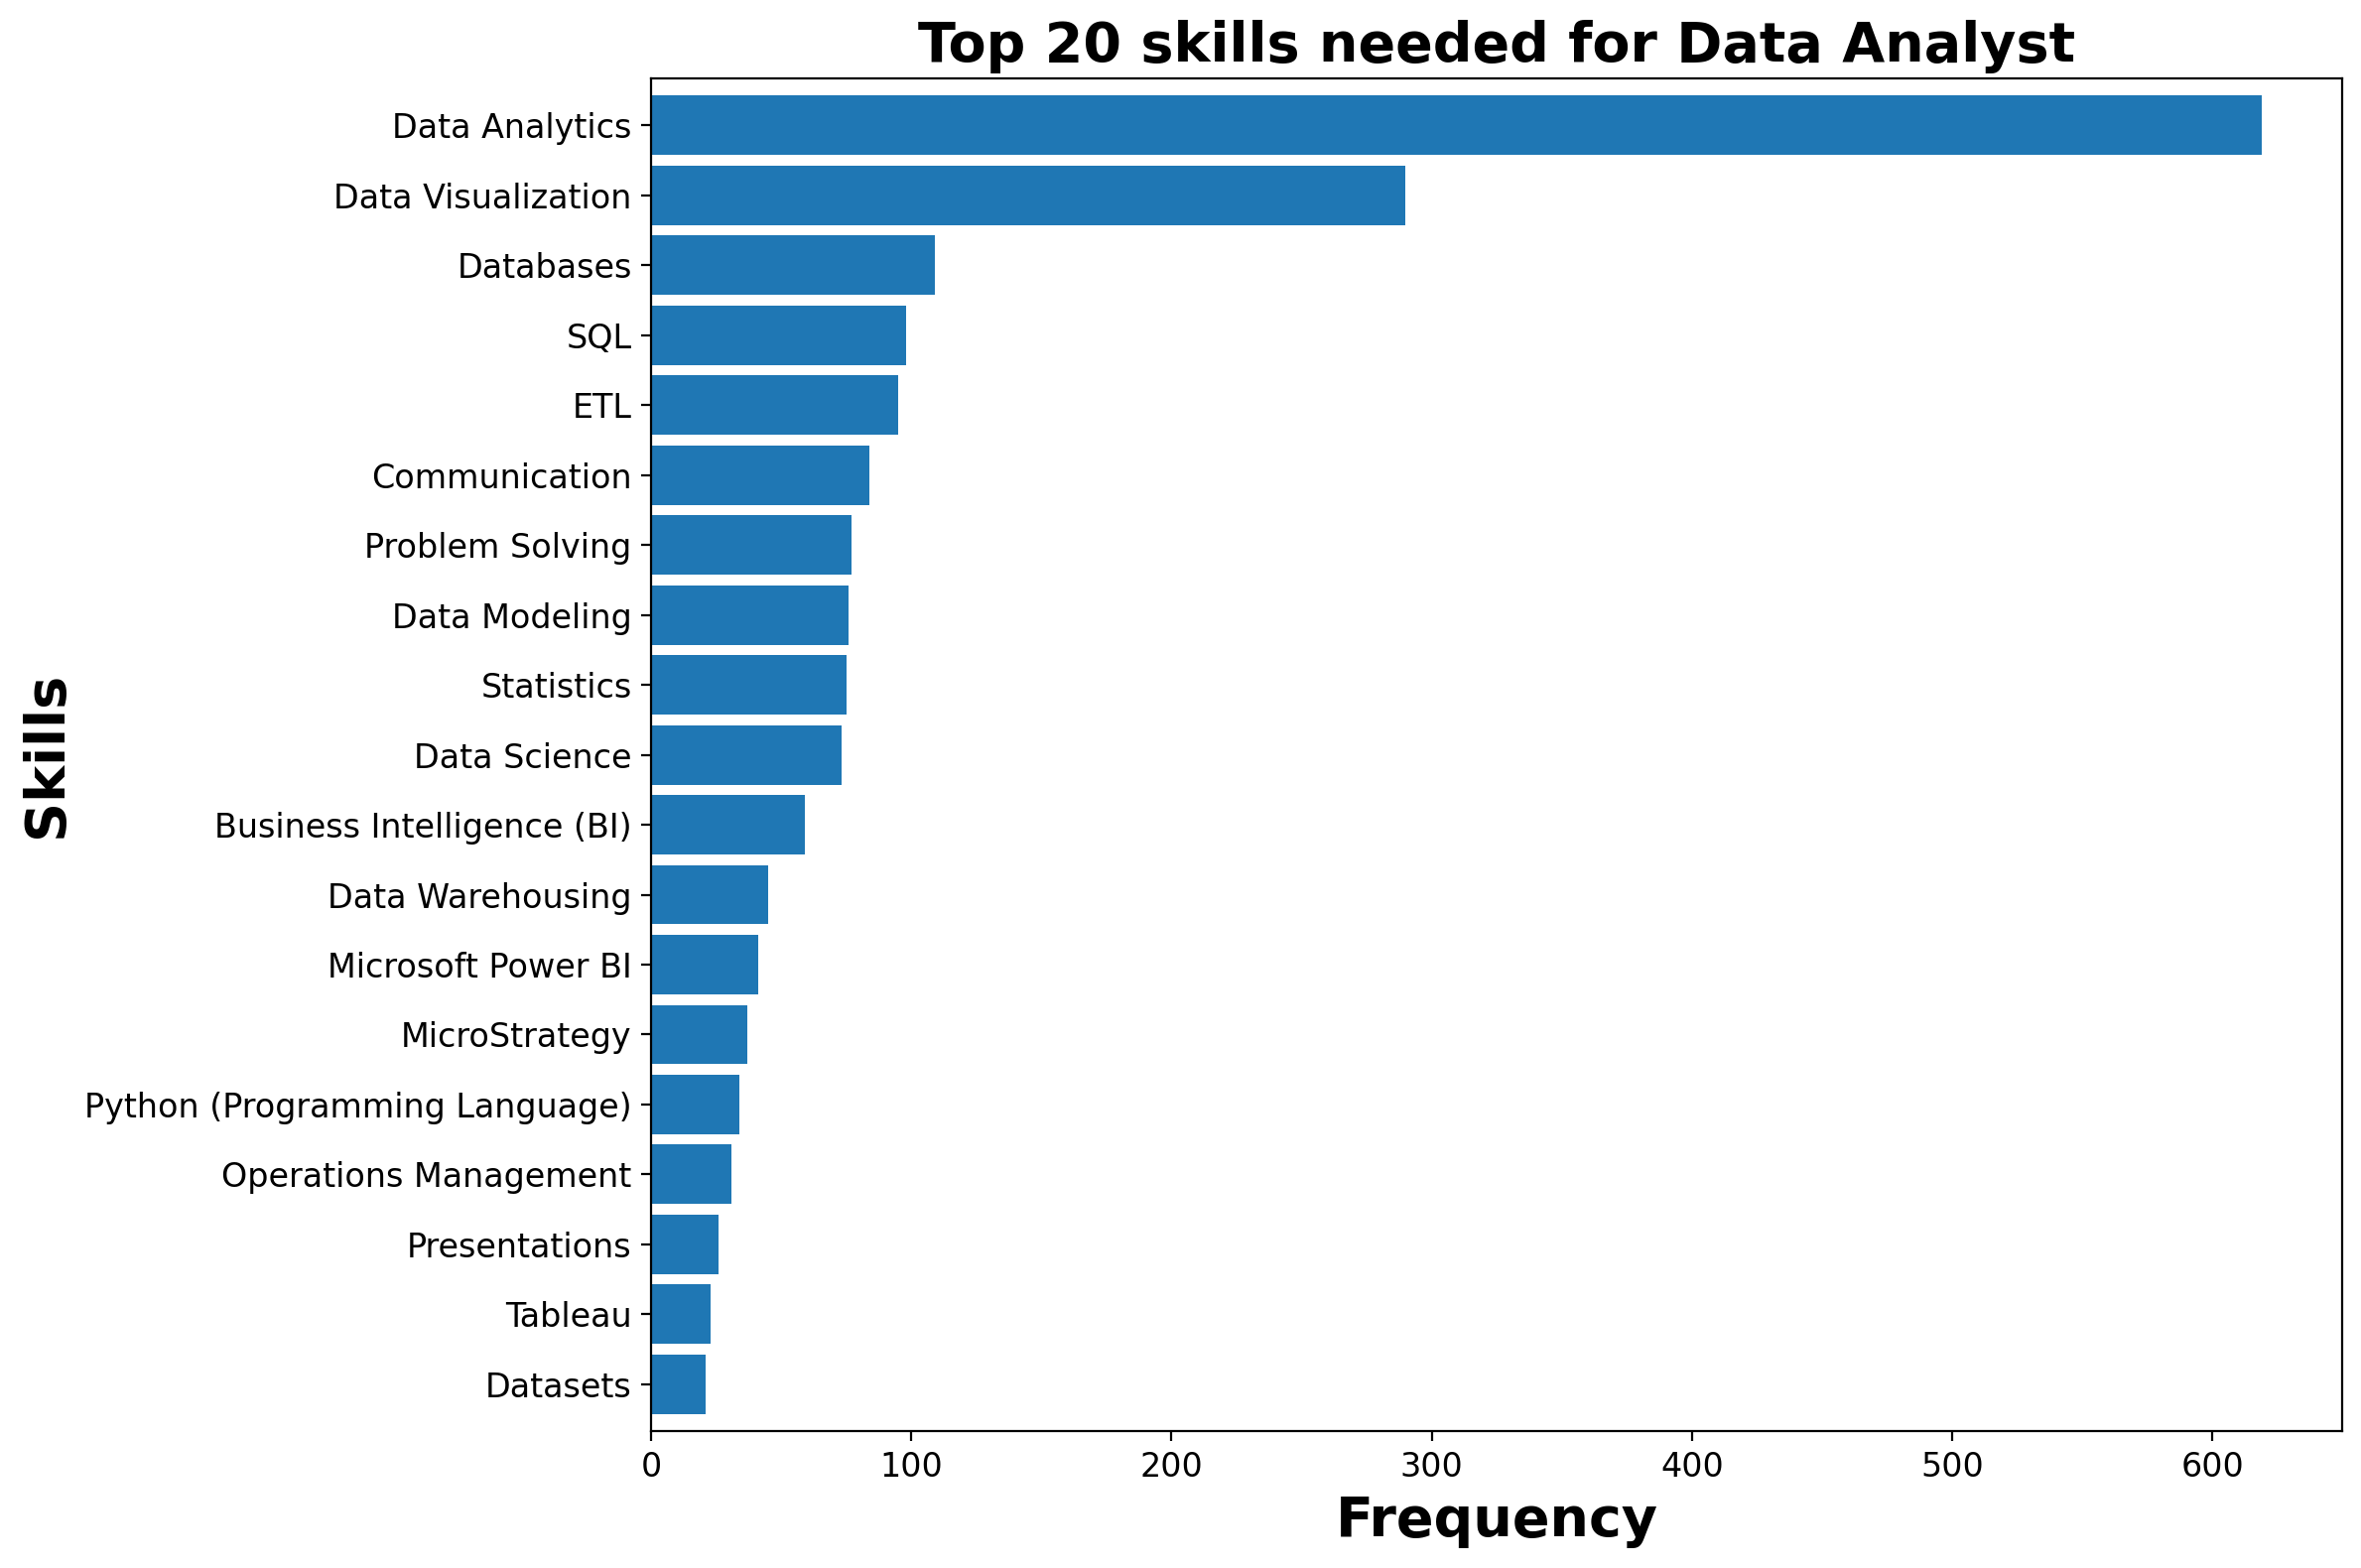

In [402]:
skills_all = [skill.strip() for sublist in concat_df.loc[concat_df['JobCategory'] == 'data analyst', 'Skills'].str.split(',') for skill in sublist]

skills = []
for skill in skills_all:
    if skill == 'Analytical Skills' or skill == 'Analytics' or skill == 'Data Analysis':
        skills.append('Data Analytics')
    elif skill == 'Dashboards' or skill == 'Visualization':
        skills.append('Data Visualization')
    elif skill == 'Load (ETL)':
        skills.append('ETL')
    elif skill == 'Extract' or skill == 'Transform':
        pass
    else:
        skills.append(skill)

plt.figure(figsize=(12,8), dpi=200)
# piechart: autopct->percentage
# concat_df['Industry'].value_counts()[:11].drop('None').plot.pie(radius=0.8, autopct='%.1f%%', textprops={'size':10})
pd.Series(skills).value_counts()[:20].drop('None').plot.barh(width=0.85).invert_yaxis()

plt.title("Top 20 skills needed for Data Analyst",size=20, weight = 'bold')
plt.xlabel("Frequency",size=20, weight = 'bold')
plt.ylabel("Skills",size=20, weight = 'bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
# skills_value_counts = pd.Series(skills).value_counts()[:30].drop('None')
# skills_value_counts

# filter_skills = skills_value_counts[skills_value_counts.index.str.contains('', case=False)]
# print(filter_skills)

## Data Visualization
Q2. Which city has the most job postings? pick top 10

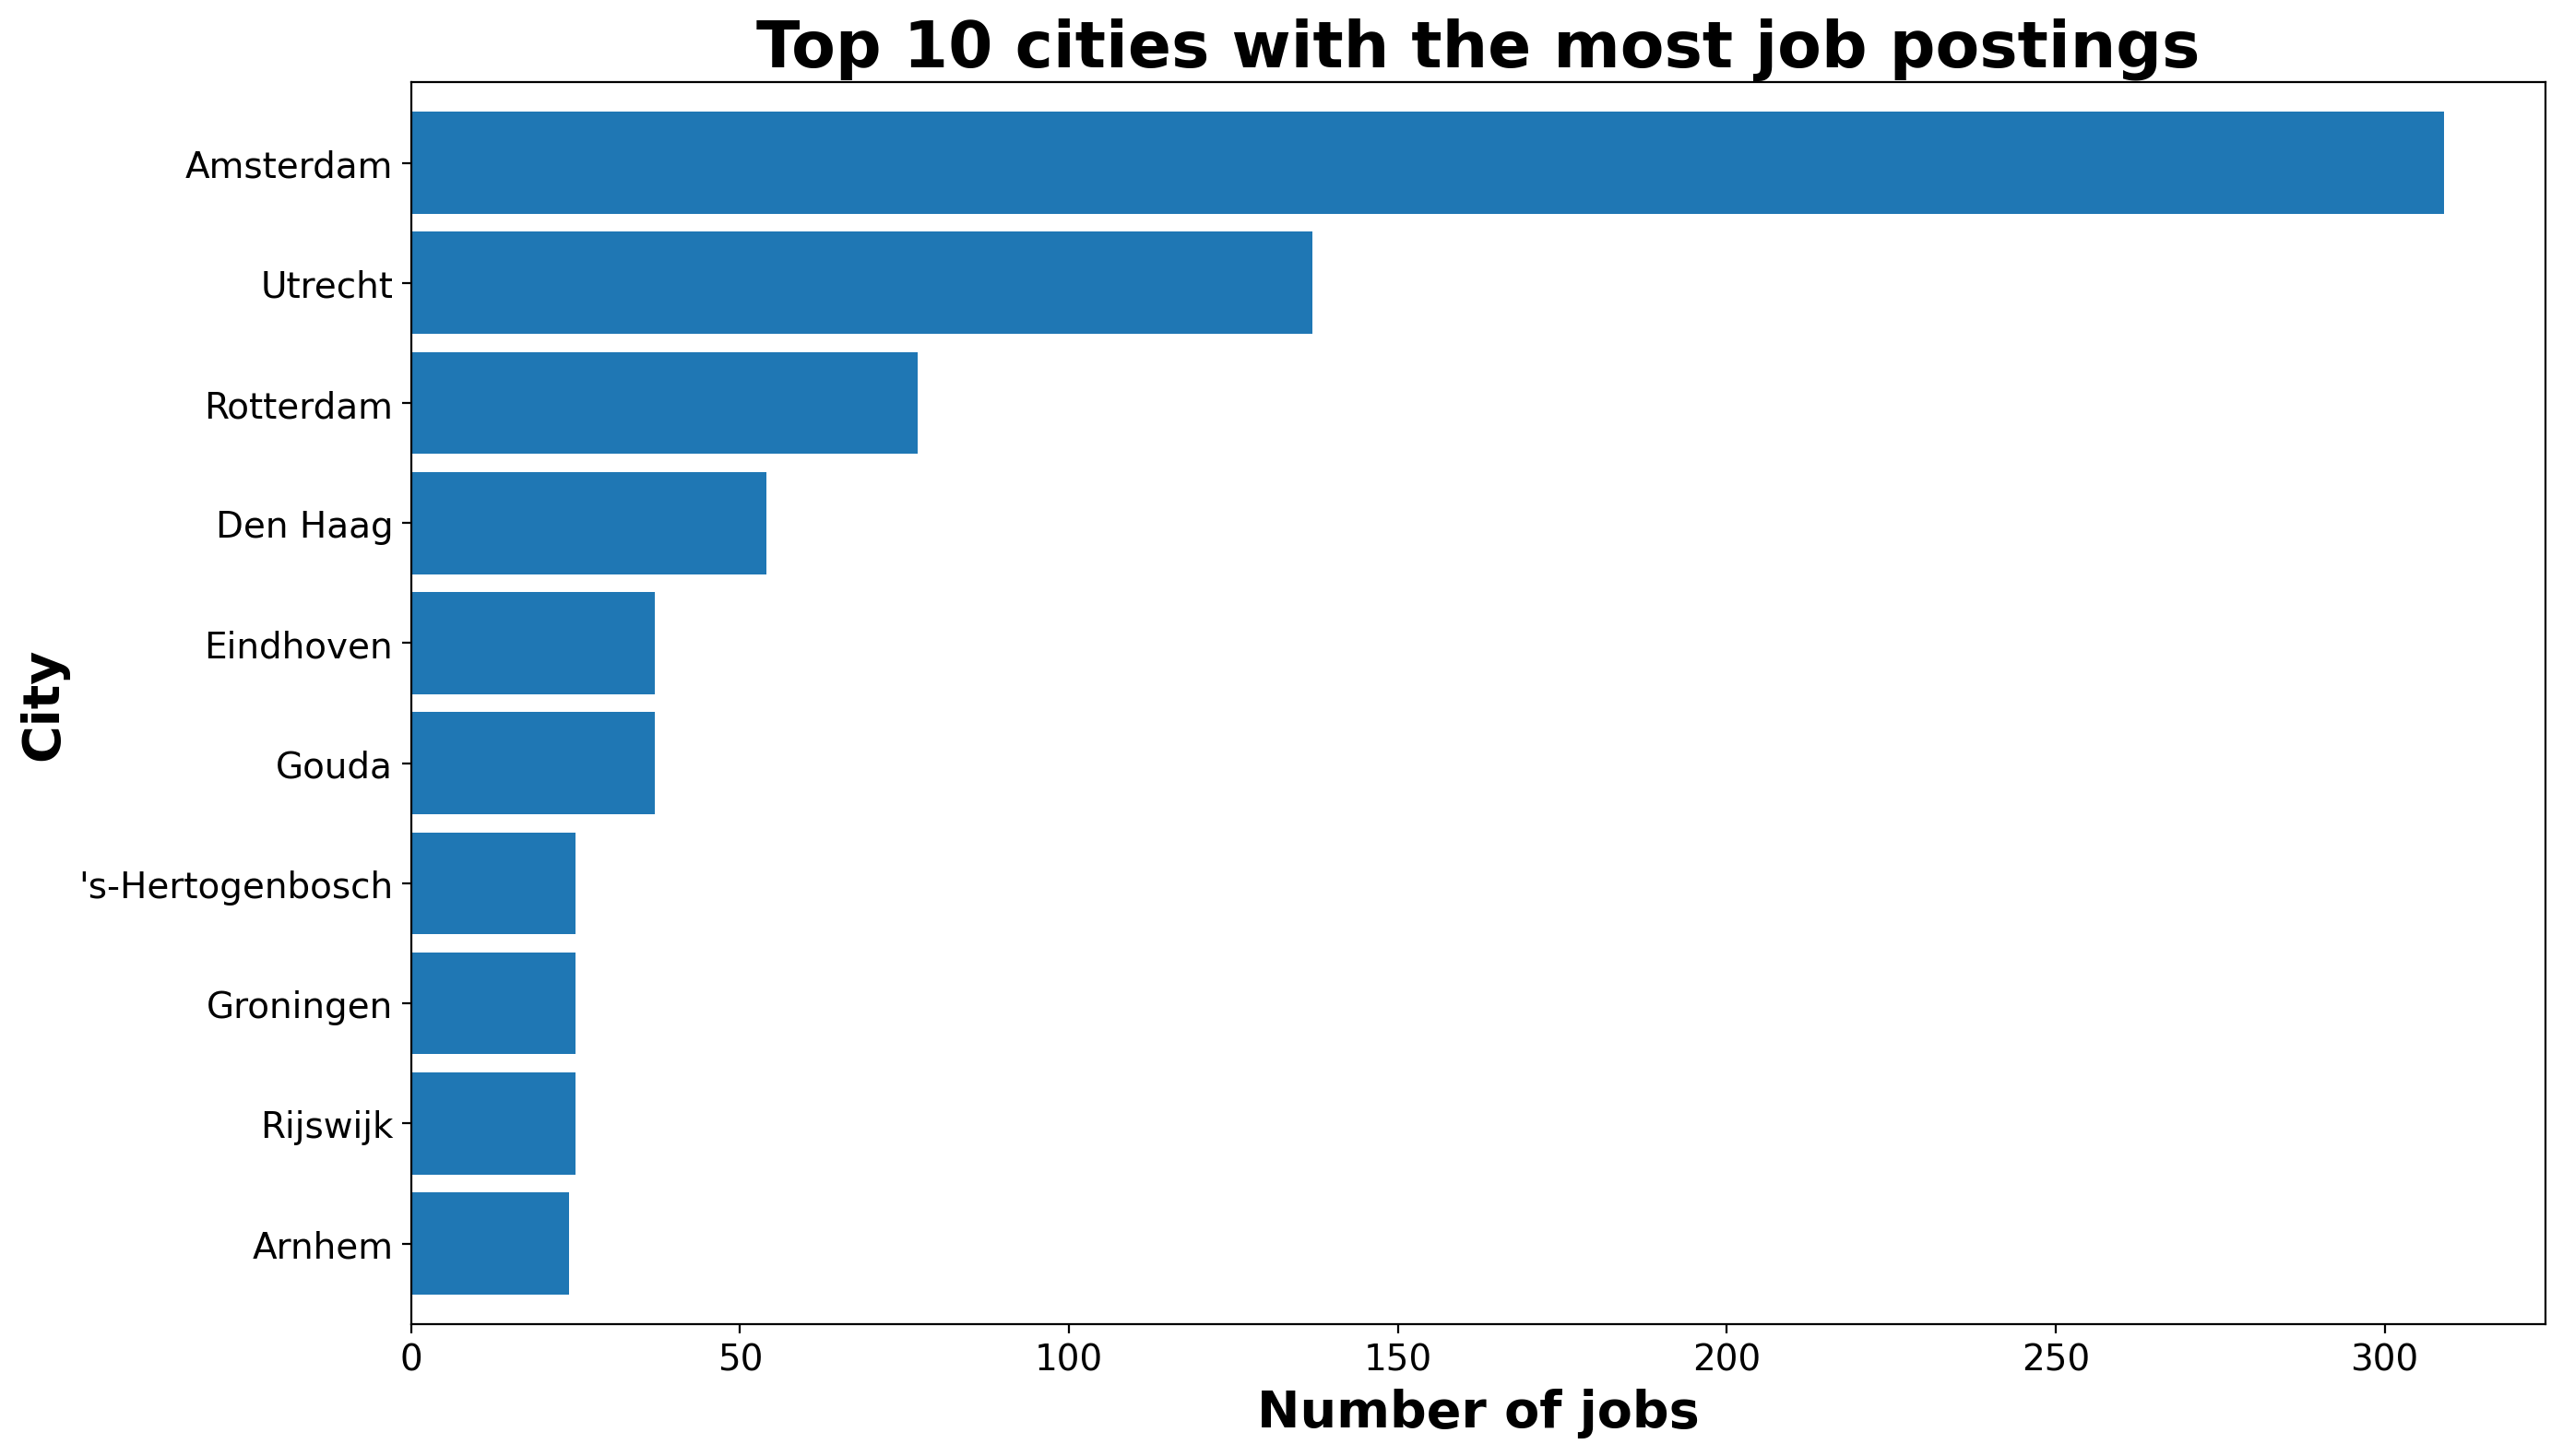

In [406]:
def barchart_cities(df):
    plt.figure(figsize=(14,8),dpi=200)
        
    city_list = []
    for city in df['City']:
        if city == 'Den Bosch' or city == 's-Hertogenbosch' or city == "’s-Hertogenbosch" or city == '5223 MB s-Hertogenbosch':
            city_list.append("'s-Hertogenbosch")
        elif city == 'The Hague' or city == '2595 DA The Hague' or city == '2511 DP  Den Haag':
            city_list.append('Den Haag')
        elif city == 'SCHIPHOL OOST' or city == 'Schiphol Centrum' or city == 'Schiphol-Oost':
            city_list.append('Schiphol')
        elif city == 'Amsterdam Zuidoost':
            city_list.append('Amsterdam')
        elif city == 'ROTTERDAM' or city == '3063 NH':
            city_list.append('Rotterdam')
        else:
            city_list.append(city)
    df['City'] = city_list
    
    # pick top 10
    # plot
    df['City'].value_counts()[:11].drop('None').plot.barh(width=0.85).invert_yaxis()
#     df['City'].value_counts()[:11].drop('None').plot.pie()

    plt.title("Top 10 cities with the most job postings",size=25, weight = 'bold')
    plt.xlabel("Number of jobs",size=20, weight = 'bold')
    plt.ylabel("City",size=20, weight = 'bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.tight_layout()
    plt.show()

    
barchart_cities(concat_df)



## Data Visualization
Q3. Which industry has the most job postings?

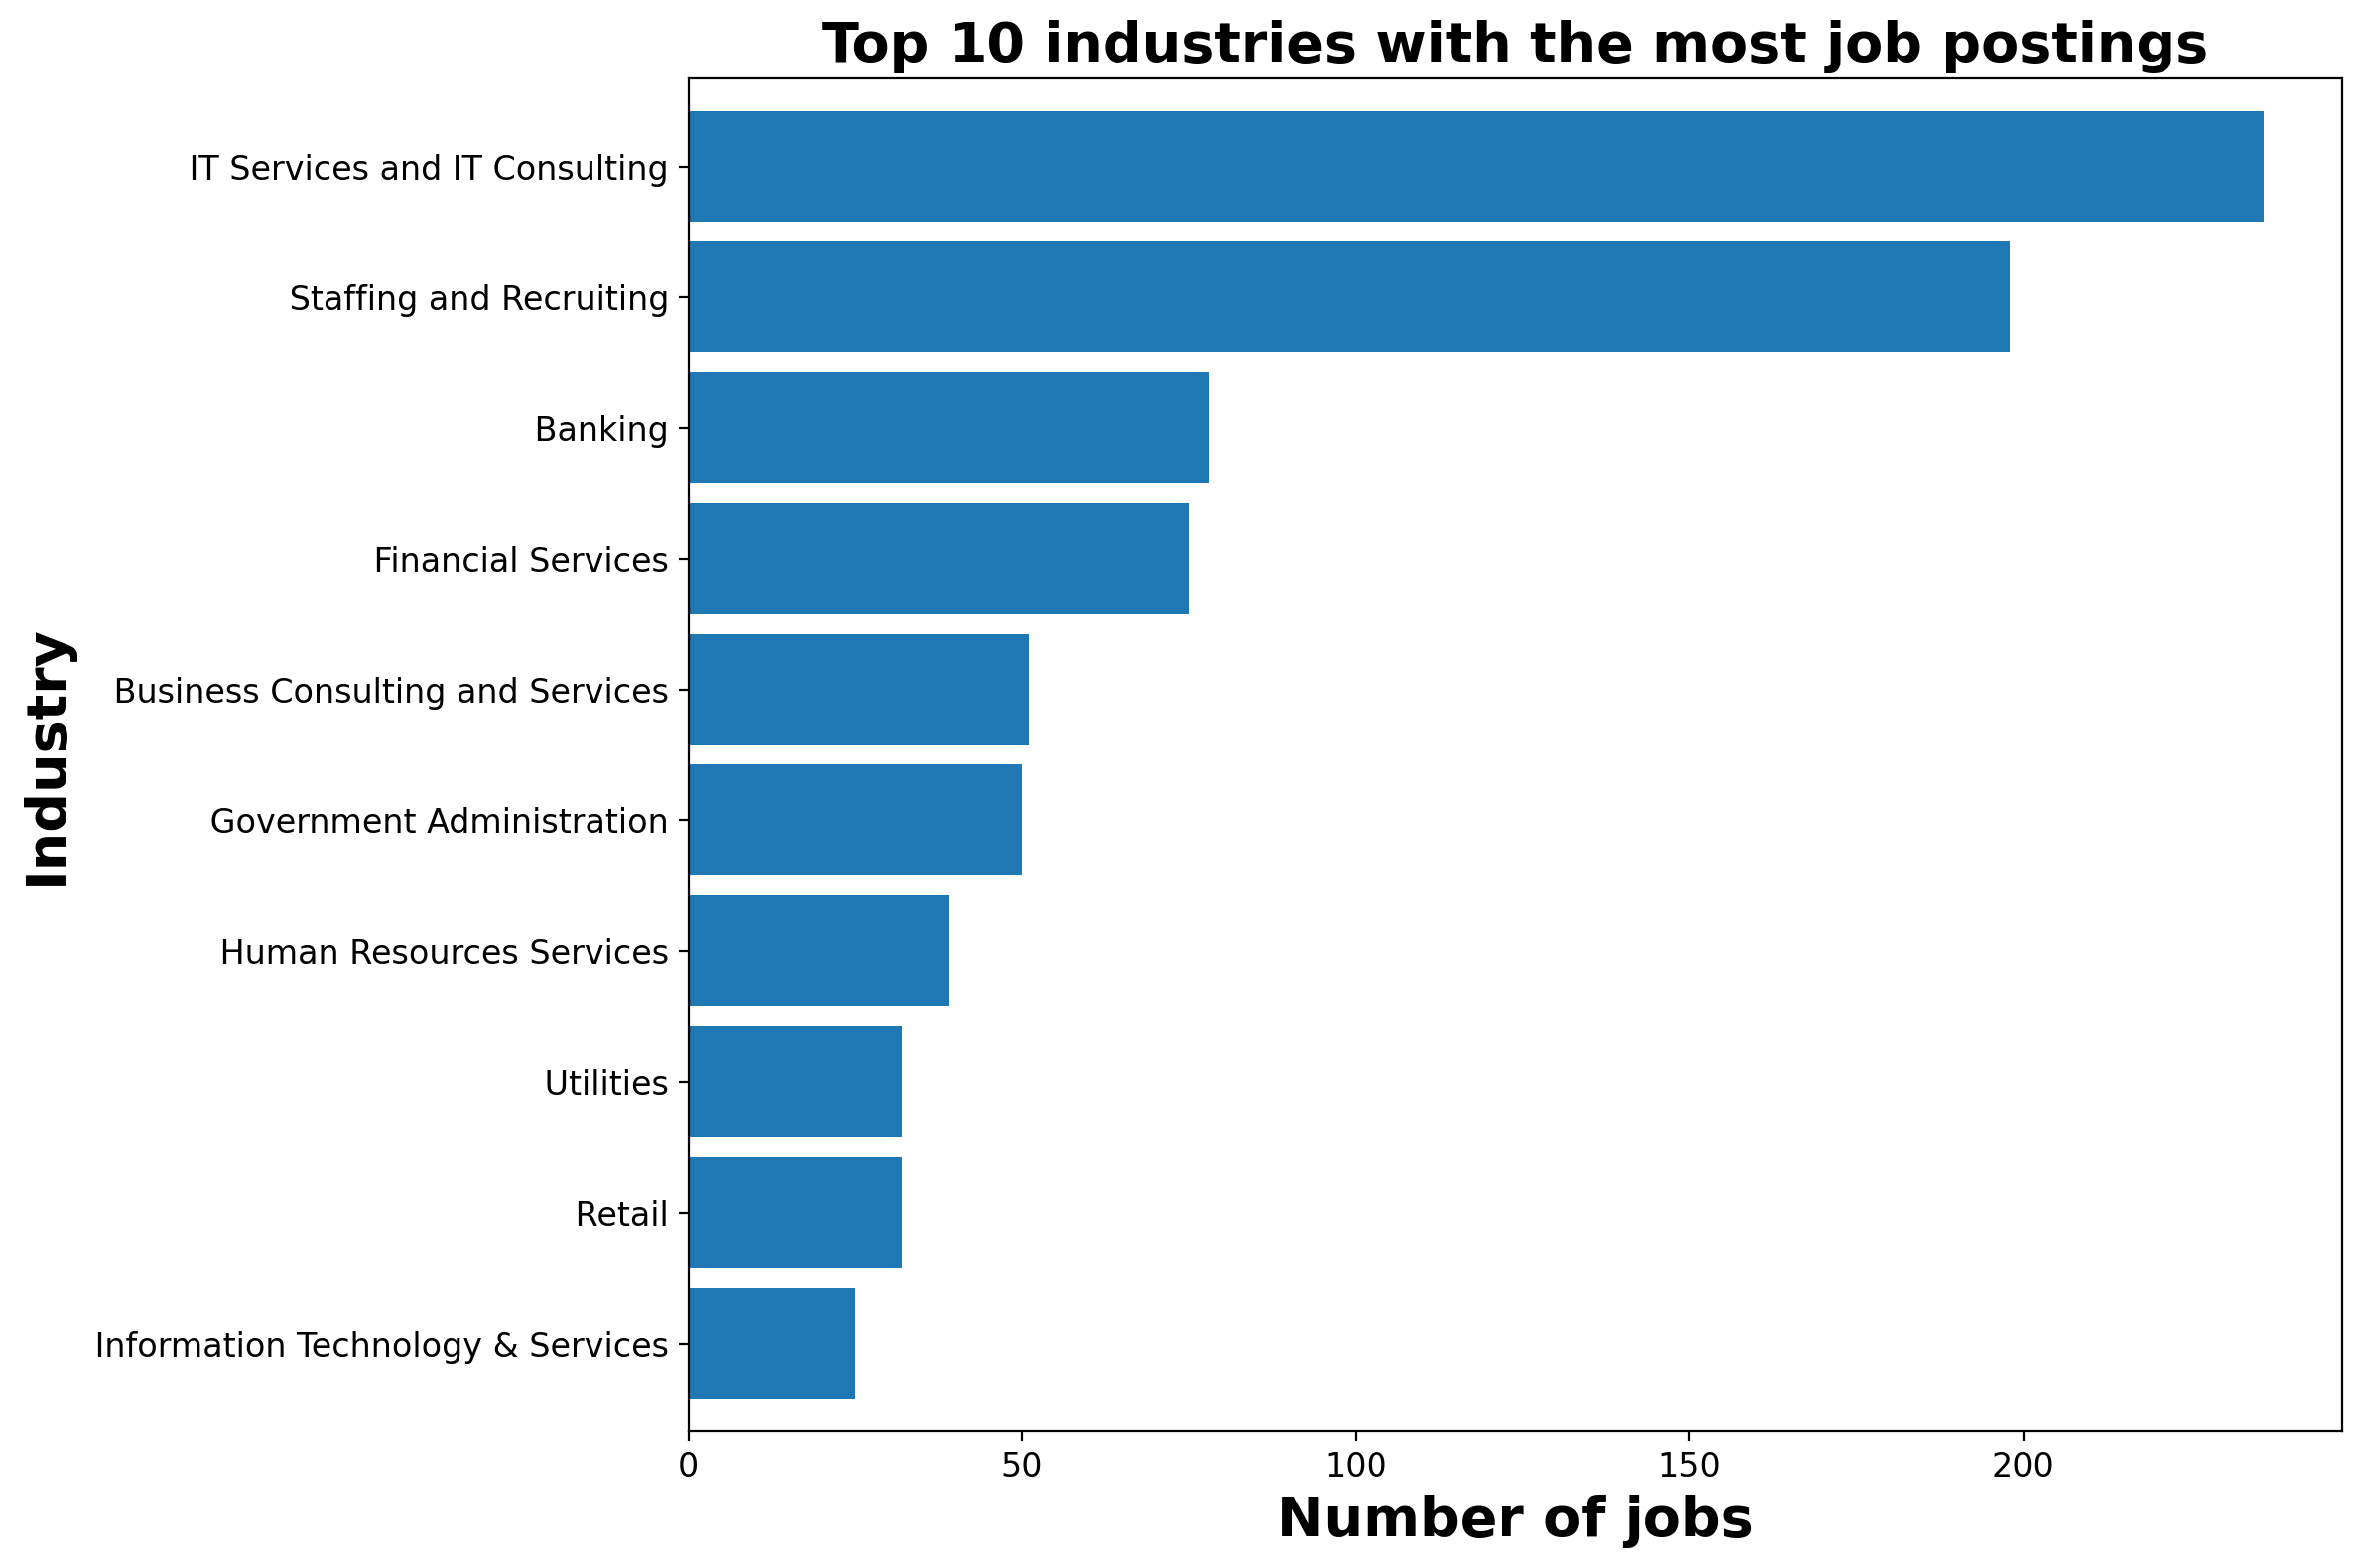

In [407]:
plt.figure(figsize=(12,8), dpi=200)
# piechart: autopct->percentage
# concat_df['Industry'].value_counts()[:11].drop('None').plot.pie(radius=0.8, autopct='%.1f%%', textprops={'size':10})
concat_df['Industry'].value_counts()[:11].drop('None').plot.barh(width=0.85).invert_yaxis()

plt.title("Top 10 industries with the most job postings",size=20, weight = 'bold')
plt.xlabel("Number of jobs",size=20, weight = 'bold')
plt.ylabel("Industry",size=20, weight = 'bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Data Visualization
Q4. What's the proportion of onsite, hybrid, and remote?

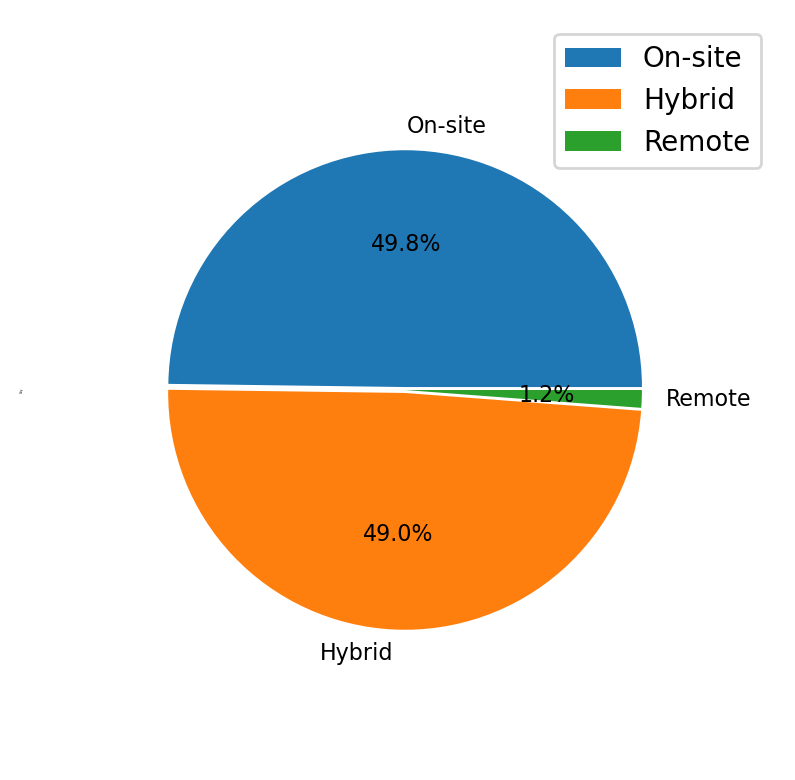

In [302]:
plt.figure(figsize=(8,4), dpi=200)
explode = concat_df['Onsite_Remote'].value_counts().apply(lambda x:x > 200)
explode = explode.apply(lambda x:0.01 if x == True else 0)
concat_df['Onsite_Remote'].value_counts()[:11].plot.pie(radius=0.8, autopct='%.1f%%', textprops={'size':8}, explode=explode)

# plt.title("title",size=16)
# plt.xlabel("Number of jobs",size=20)
plt.ylabel("City",size=0.001)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

## Data Visualization
Q5. What's the proportion of small, medium, large size companies from the job posts?
- Definition:
-> Small size company -> With Employees less than 50 people
-> Medium size company -> With Employees less than 250 people but more than 50 people
-> Large size company -> With Employees more than 250 people

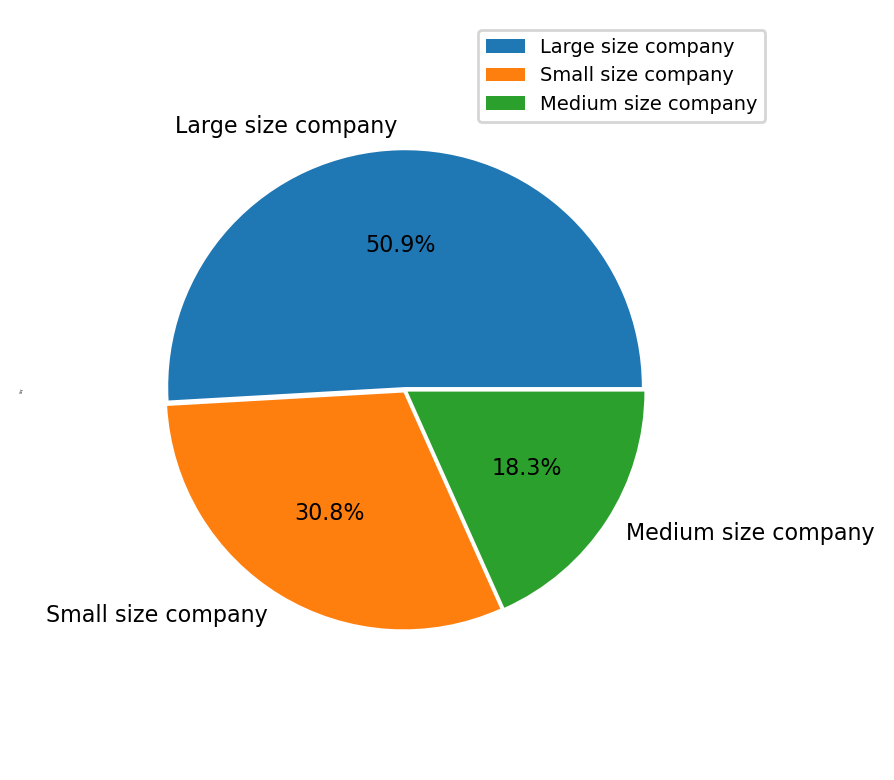

In [328]:
def small_medium_large(df):
    if df['EmployeesNum'] < 50:
        return 'Small size company'
    elif df['EmployeesNum'] >= 50 and df['EmployeesNum'] < 250:
        return 'Medium size company'
    else:
        return 'Large size company'
        
concat_df['CompanySize'] = concat_df.apply(small_medium_large, axis=1)

plt.figure(figsize=(8,4), dpi=200)
explode = concat_df['CompanySize'].value_counts().apply(lambda x:x > 200)
explode = explode.apply(lambda x:0.01 if x == True else 0)
concat_df['CompanySize'].value_counts().plot.pie(radius=0.8, autopct='%.1f%%', textprops={'size':8}, explode=explode)

# plt.title("title",size=16)
# plt.xlabel("Number of jobs",size=20)
plt.ylabel("City",size=0.001)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.legend(loc=1, prop={'size': 7})
plt.tight_layout()
plt.show()
